In [1]:
from solution_code import TwoBody, TwoBodyTMat, Cubherm, ThreeBody, OBEpot
import numpy as np
import matplotlib.pyplot as plt



para=[700.0, 0.020167185806378923]

pot=OBEpot(nx=24,mpi=138.0,C0=para[1],A=-1.0/6.474860194946856,cutoff=para[0])
kernel=ThreeBody(pot,nx=8,np1=20,np2=12,nq1=20,nq2=12,lmax=0,j12max=1,l3max=0,j3min=1,
         j3max=1,parimin=1,parimax=1,tau3min=1,tau3max=1)
ener,eta,fadcomp=kernel.esearch(neigv=1,e1=-0.05,e2=-0.06,elow=-0.02,tol=1e-8)
print("Ener:",ener*kernel.hbarc,eta)

nalphaNN 2
   alpha12    l12     s12      J12     t12
     0       0        0           0      1
     1       0        1           1      0
numabarNN 2
nalpha3N:  2
tau3 1
tau3 1
   alpha3N      l12       s12       J12          l3        I3        pari      t12     tau3
         0        0         0         0        0         1        1        1        1        1       1
         1        0         1         1        0         1        1        1        1        0       1
time:  38.085542200000006
pmat shape (2048, 2048)
E -0.05
maxpos, eigb 350 1.4183844112702273
E -0.06
maxpos, eigb 350 1.2928956292329634
E -0.08334038345722312
maxpos, eigb 350 1.0955406294444758
E -0.09320695484791053
maxpos, eigb 350 1.0353619921449
E -0.09900472022896614
maxpos, eigb 350 1.004204492523465
E -0.09978708920894304
maxpos, eigb 350 1.0002047010819746
E -0.09982712924079153
maxpos, eigb 350 1.0000012358222177
E -0.09982737243887367
maxpos, eigb 350 1.0000000003651146
E -0.099827372510746
maxpos, eigb 3

In [3]:
# fadout = kernel.faddeev(fadcomp, ener)
wf = kernel.applyperm(fadcomp)
ekin = kernel.calc_ekin(fadcomp, wf)
# epot = kernel.calc_vpot(fadout, wf)

print("Ener:",ener*kernel.hbarc,eta)
print(ekin)

Ener: -19.698635935427976 1.0000000000000004
(0.06544334715289304, 0.12547880284377794)


In [5]:
-19.698635935427976 / kernel.hbarc

-0.099827372510746

In [6]:
bj_list = [0,1]  # J=1/2, J=3/2
wf_list = []

pot=OBEpot(nx=24,mpi=138.0,C0=para[1],A=-1.0/6.474860194946856,cutoff=para[0])


for bj_idx, bj in enumerate(bj_list):
    print("Current bj: ", bj)
    # perform wavefunction evaluation for each angular momentum state
    kernel=ThreeBody(pot,nx=8,np1=20,np2=12,nq1=20,nq2=12,lmax=bj+1,j12max=bj,l3max=0,j3min=1,
         j3max=1,parimin=1,parimax=1,tau3min=1,tau3max=1)
    
    # ener,eta,fadcomp=kernel.esearch(neigv=1,e1=-0.0046,e2=-0.0048,elow=-0.001,tol=1e-3)
    # eigv, fadcomp = kernel.eigv_iter(E=-0.0047133078773, neigv=1)
    # eigv, fadcomp = kernel.eigv_iter(E=-0.099827372510746, neigv=1)
    ener,eta,fadcomp=kernel.esearch(neigv=1,e1=-0.05,e2=-0.06,elow=-0.001,tol=1e-5)
#     fadout = kernel.faddeev(fadcomp)
    wf = kernel.applyperm(fadcomp)
    
    # evaluate kinetic energy
    ekin = kernel.calc_ekin(fadcomp, wf)[0] * kernel.hbarc
    
    result_dict = {"wf":wf, "kernel":kernel, "ekin":ekin}
    wf_list.append(result_dict)

Current bj:  0
nalphaNN 2
   alpha12    l12     s12      J12     t12
     0       0        0           0      1
     1       1        1           0      1
numabarNN 2
nalpha3N:  1
tau3 1
   alpha3N      l12       s12       J12          l3        I3        pari      t12     tau3
         0        0         0         0        0         1        1        1        1        1       1
time:  12.93224619999819
pmat shape (1024, 1024)
E -0.05
maxpos, eigb 175 0.35459610281755644
E -0.06
maxpos, eigb 175 0.3232239073082418
E -0.001
maxpos, eigb 175 4.229180330817158
E -0.041837887860740296
maxpos, eigb 175 0.38876184451478324
E -0.035338159943342266
maxpos, eigb 175 0.4251157993134785
E -0.001
maxpos, eigb 175 4.229180330817158
E -0.03014885112153025
maxpos, eigb 175 0.4638551408507051
E -0.02599834462064132
maxpos, eigb 175 0.5052153248071554
E -0.001
maxpos, eigb 175 4.229180330817158
E -0.022676939128505613
maxpos, eigb 175 0.5494582332744411
E -0.02002283477136375
maxpos, eigb 175 0.5968388

In [12]:
# print kinetic energy
for bj_idx, bj in enumerate(bj_list):
    ekin = wf_list[bj_idx]["ekin"]
    print("energy is: {0} MeV".format(ekin))

energy is: 3.2332011465072545 MeV
energy is: 12.913739354091108 MeV


In [14]:
-0.026458428407181645 * kernel.hbarc

1 - 0.9999999999997928

2.071676163950542e-13

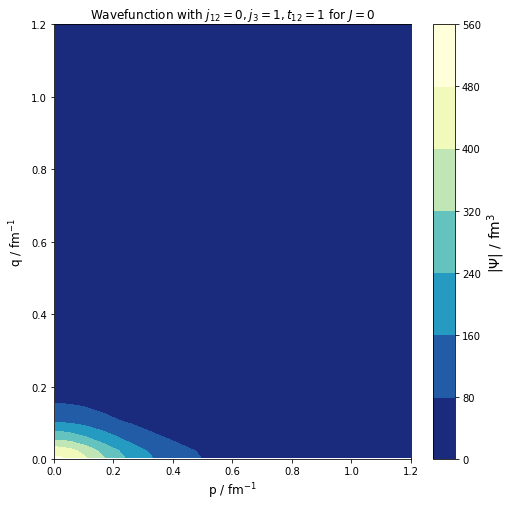

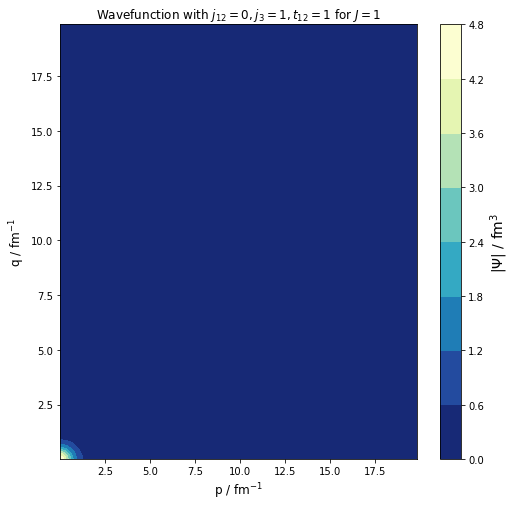

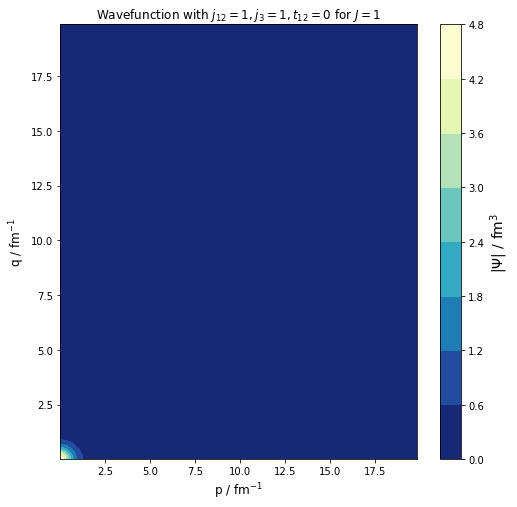

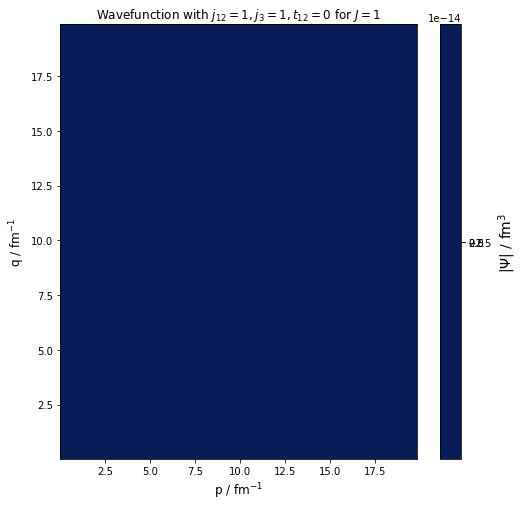

In [9]:
for bj_idx, bj in enumerate(bj_list):
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list[bj_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    # alpha_idces = [0,1,10,-1]

    


    for alpha in range(k.nalpha3N):
        # quantum numbers associated to this particular alpha index
        # alpha_list = k.qnalpha[alpha_idx]
        # print(alpha_list)
        # alpha_idx = alpha_dict["alpha"]
        j12 = k.qnalpha3N[2,alpha]
        j3=k.qnalpha3N[5,alpha]
        t12=k.qnalpha3N[8,alpha]
        qm_numbers = [j12, j3, t12]

        # create combined grid
        P, Q = np.meshgrid(pgrid, qgrid)

        # plotting the results
        wf = np.abs(wf_list[bj_idx]["wf"][alpha,:,:])  # take abs value
        
        fig, ax = plt.subplots(figsize=(8,8))
        im = ax.contourf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
        ax.set_xlabel("p / fm$^{{-1}}$", fontsize=12)
        ax.set_ylabel("q / fm$^{{-1}}$", fontsize=12)
        # if bj_idx == 0:
        ax.set_xlim([0,1.2])
        ax.set_ylim([0,1.2])
        ax.set_title("Wavefunction with $j_{{12}}={0}, j_3={1}, t_{{12}}={2}$ for $J={3}$".format(*qm_numbers, bj))
        
        cbar = fig.colorbar(im)
        cbar.ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=14)

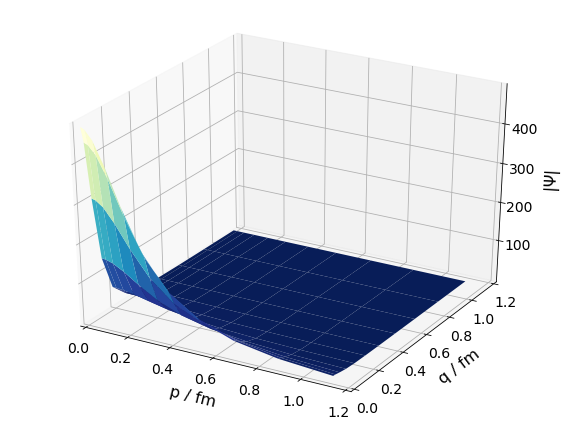

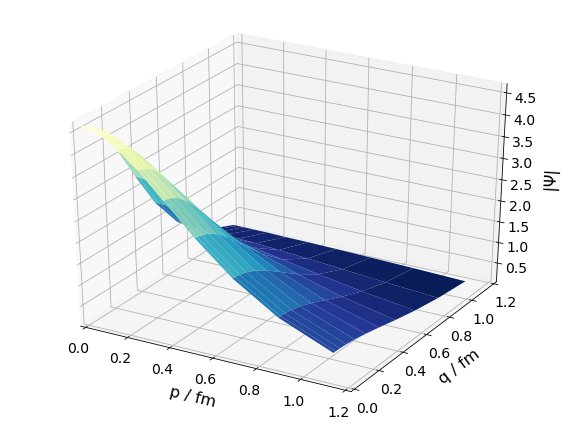

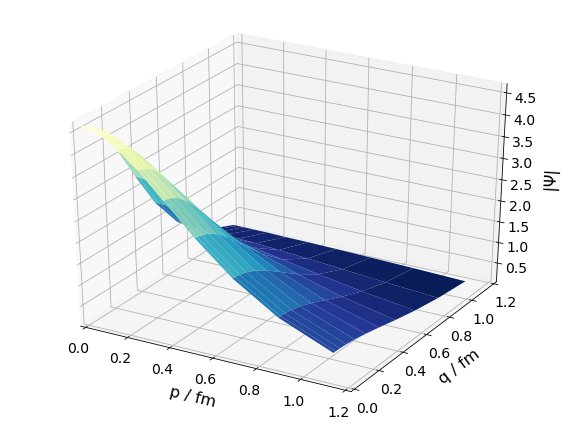

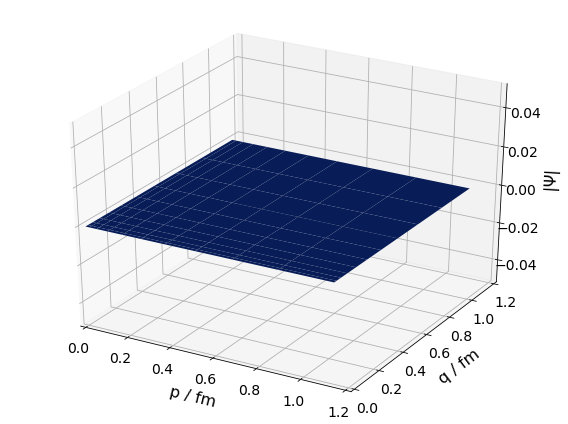

In [10]:
# 3d plots

bj_list=[0.5, 1.5]
# momentum grids are the same for each kernel, so can just use any of them
# pgrid = kernel.pgrid
# qgrid = kernel.qgrid
# alpha_idx = 0

# quantum numbers associated to this particular alpha index
# qm_numbers = list(kernel.qnalpha[alpha_idx].values())[1:]
# print("Configuration for alpha chosen: ", qm_numbers)

# perform truncation to some upper limit for p, q

ferm_3d_templ = "ferm_3d_alpha{0}_bj{1}.png"

for bj_idx, bj in enumerate(bj_list):
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list[bj_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    
    # alpha_idces = [0, 1, 10, -1]

    for alpha in range(k.nalpha3N):
        # quantum numbers associated to this particular alpha index
        # alpha_list = k.qnalpha[alpha_idx]
        # print(alpha_list)
        # alpha_idx = alpha_dict["alpha"]
        j12 = k.qnalpha3N[2,alpha]
        j3=k.qnalpha3N[5,alpha]
        t12=k.qnalpha3N[8,alpha]
        qm_numbers = [j12, j3, t12]

        # pmax = 1.2 if bj_idx == 0 else np.max(pgrid)
        # qmax = 1.2 if bj_idx == 0 else np.max(qgrid)
        pmax=1.2
        qmax=1.2
        pmax_idx = np.argwhere(pgrid >= pmax)[0][0]
        qmax_idx = np.argwhere(qgrid >= qmax)[0][0]
        pgrid_new = pgrid[:pmax_idx]
        qgrid_new = qgrid[:qmax_idx]

        # create combined grid
        P, Q = np.meshgrid(pgrid_new, qgrid_new)

        # plotting the results
        wf = np.abs(wf_list[bj_idx]["wf"][alpha,:pmax_idx,:qmax_idx])  # take abs value
        
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        im = ax.plot_surface(P, Q, wf,cmap=plt.cm.YlGnBu_r)
        ax.set_xlabel("p / fm", fontsize=16, labelpad=10)
        ax.set_ylabel("q / fm", fontsize=16, labelpad=10)
        ax.set_zlabel("$|\Psi|$", fontsize=16, labelpad=10)
        ax.set_xlim([0,pmax])
        ax.set_ylim([0,qmax])
        # ax.set_title("Wavefunction with $j_{{12}}={0}, j_3={1}, t_{{12}}={2}$ for $J={3}$".format(*qm_numbers, bj))
        
        # cbar = fig.colorbar(im)
        # cbar.ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=14)

        # ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16, labelpad=12)
        # ax.set_ylabel("p' / fm$^{{-1}}$", fontsize=16, labelpad=12)
        # ax.set_zlabel(r"$t_{\alpha}(p,p^\prime,q)$", fontsize=16, labelpad=10)
        ax.tick_params(axis='both', which='major', labelsize=14)

        fig.tight_layout()

        # plt.savefig(os.path.join(ferm_path, ferm_3d_templ.format(alpha_idx, bj)), dpi=300)

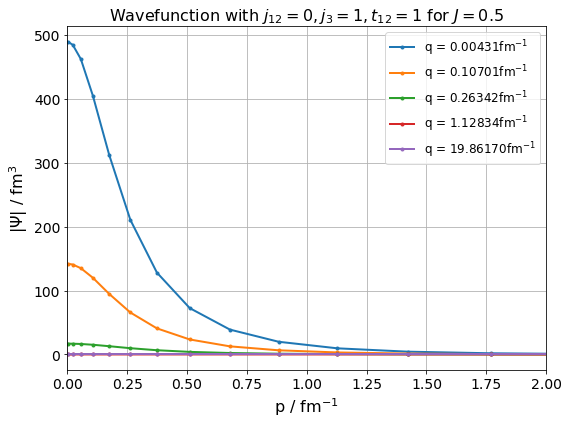

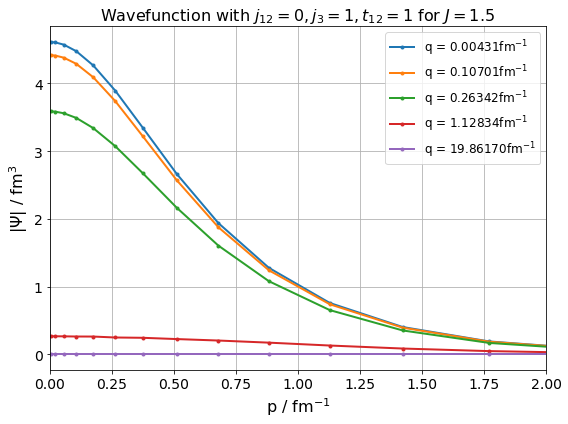

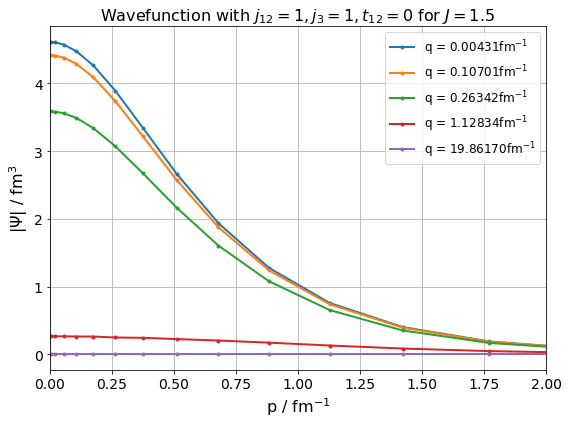

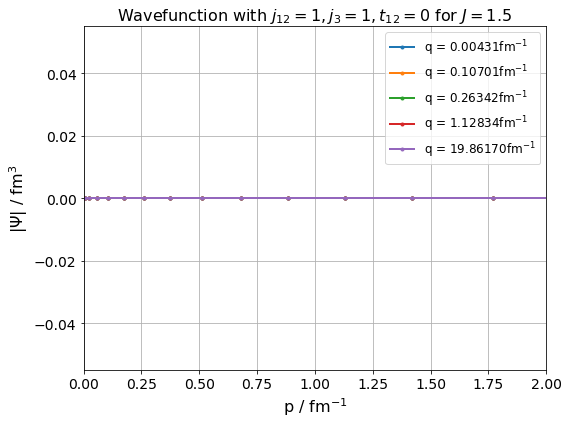

In [11]:
# projection onto one particular q-value
q_idces = [0,3,5,10,-1]

bj_list=[0.5, 1.5]

# ferm_path = os.path.join(dir_to_images, "fermion")

# ferm_qproj_templ = "ferm_qproj_alpha{0}_bj{1}.png"


for bj_idx, bj in enumerate(bj_list):
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list[bj_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    
    # alpha_idces = [0,1,10,-1]

    for alpha in range(k.nalpha3N):
        # quantum numbers associated to this particular alpha index
        # alpha_list = k.qnalpha[alpha_idx]
        # print(alpha_list)
        # alpha_idx = alpha_dict["alpha"]
        j12 = k.qnalpha3N[2,alpha]
        j3=k.qnalpha3N[5,alpha]
        t12=k.qnalpha3N[8,alpha]
        qm_numbers = [j12, j3, t12]
        fig, ax = plt.subplots(figsize=(8,6))
        for q_idx in q_idces:
            
            qval = qgrid[q_idx]
            # create combined grid
            # P, Q = np.meshgrid(pgrid, qgrid)

            # plotting the results
            wf = np.abs(wf_list[bj_idx]["wf"][alpha,q_idx,:])  # take abs value
            
            
            # im = ax.qprojf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
            ax.plot(pgrid, wf, marker="o", lw=2.0, ms=3.0, label="q = {0:.5f}fm$^{{-1}}$".format(qval))

        ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16)
        ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=16)
        # if bj_idx == 0:
        #     ax.set_xlim([0,1.2])
        #     ax.set_ylim([0,1.2])
        ax.set_xlim([0,2.0])
        ax.set_title("Wavefunction with $j_{{12}}={0}, j_3={1}, t_{{12}}={2}$ for $J={3}$".format(*qm_numbers, bj), fontsize=16)

        # cbar = fig.colorbar(im)
        # cbar.ax.set_ylabel("$|\Psi|$", fontsize=14)
        ax.grid()
        ax.legend(prop={"size":12})

        ax.tick_params(axis='both', which='major', labelsize=14)

        fig.tight_layout()

        # plt.savefig(os.path.join(ferm_path, ferm_qproj_templ.format(alpha_idx, bj)), dpi=300)